In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# This is the file path for the complete banking data csv
bank_file_path = "../data/bank/bank-full.csv"

# This is the Data Set we are going to make the Analysis
bank_data = pd.read_csv(bank_file_path, sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [309]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [310]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [311]:
# First we need to check what is present in the Data Set we need to work
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [312]:
def replace_unknown_with_nan(data_frame):
    data_frame_clean = data_frame.copy()

    # Replace 'unknown' with NaN for all columns
    data_frame_clean = data_frame_clean.replace('unknown', np.nan)
    print("\n\n")
    # Print summary of NaN values per column
    nan_summary = data_frame_clean.isna().sum()
    print_message(
        "\nNumber of NaN values per column:", nan_summary
    )
    # Calculate percentage of NaN values
    nan_percentage = (data_frame_clean.isna().sum() /
                      len(data_frame_clean) * 100).round(2)
    print_message(
        "\nPercentage of NaN values per column:", nan_percentage
    )
    return data_frame_clean


def print_message(arg0, arg1):
    print(arg0)
    print(arg1[arg1 > 0])

    print("\n\n")

In [313]:
bank_data_clean = replace_unknown_with_nan(bank_data)
bank_data_clean





Number of NaN values per column:
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64




Percentage of NaN values per column:
job           0.64
education     4.11
contact      28.80
poutcome     81.75
dtype: float64





,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


Summary Statistics for Age:
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


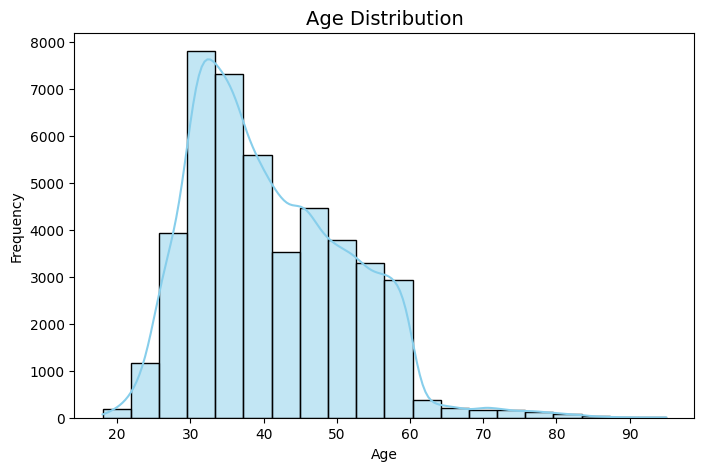

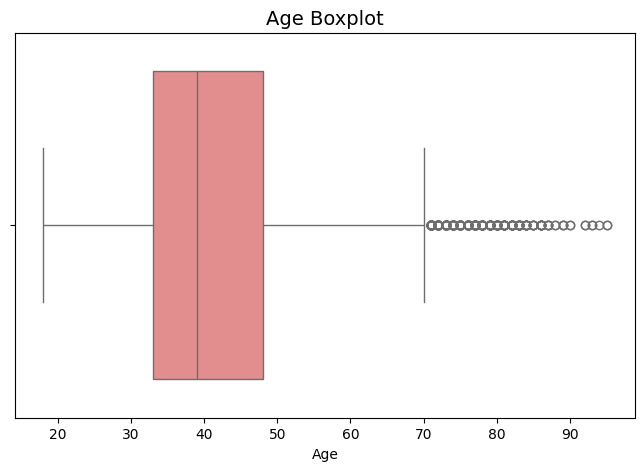

In [314]:
# Summary statistics
print("Summary Statistics for Age:")
print(bank_data_clean['age'].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(bank_data_clean['age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=bank_data_clean['age'], color='lightcoral')
plt.title("Age Boxplot", fontsize=14)
plt.xlabel("Age")
plt.show()

Occupation Value Counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/3367570588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


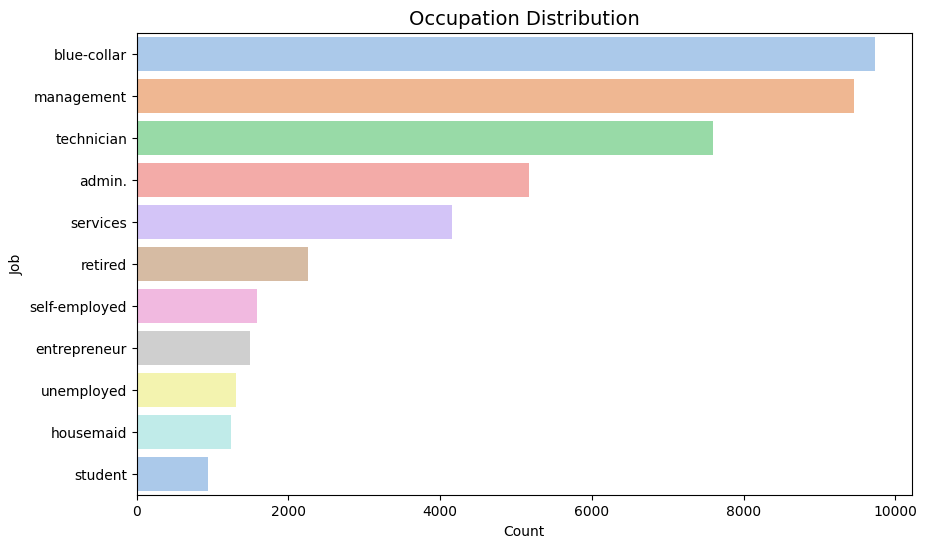

In [315]:
# Value counts
print("Occupation Value Counts:")
print(bank_data_clean['job'].value_counts())

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(
    y=bank_data_clean['job'], order=bank_data_clean['job'].value_counts().index, palette="pastel")
plt.title("Occupation Distribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Job")
plt.show()

Marital Status Value Counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/2149253136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bank_data_clean['marital'], order=bank_data_clean['marital'].value_counts(


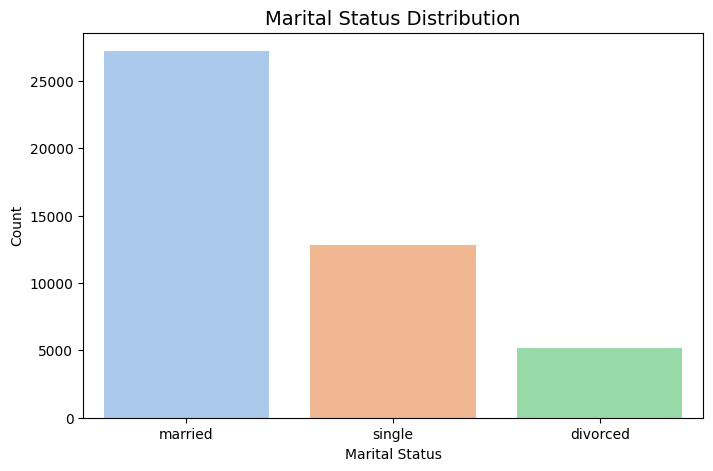

In [316]:
# Value counts
print("Marital Status Value Counts:")
print(bank_data_clean['marital'].value_counts())

# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x=bank_data_clean['marital'], order=bank_data_clean['marital'].value_counts(
).index, palette="pastel")
plt.title("Marital Status Distribution", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Education Level Value Counts:
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/2741361900.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bank_data_clean['education'],


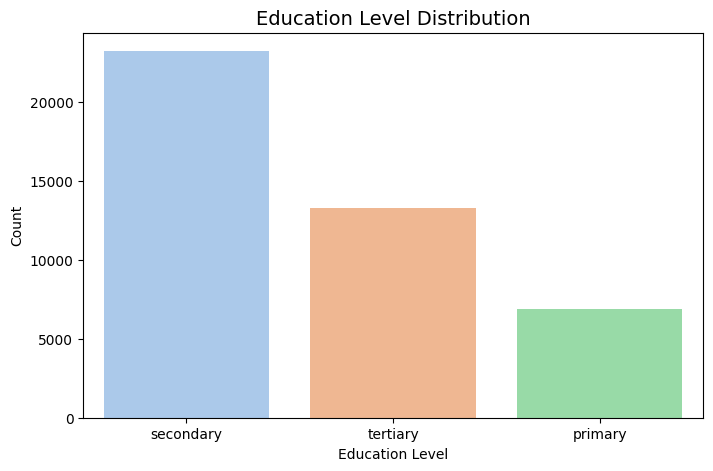

In [317]:
# Value counts
print("Education Level Value Counts:")
print(bank_data_clean['education'].value_counts())

# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x=bank_data_clean['education'],
              order=bank_data_clean['education'].value_counts().index, palette="pastel")
plt.title("Education Level Distribution", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

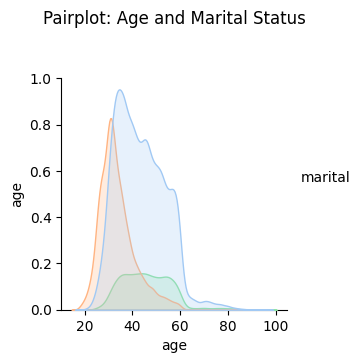

In [318]:
# Encoding categorical variables for pairplot
encoder = LabelEncoder()
bank_data_clean['marital_encoded'] = encoder.fit_transform(
    bank_data_clean['marital'])
bank_data_clean['education_encoded'] = encoder.fit_transform(
    bank_data_clean['education'])
bank_data_clean['job_encoded'] = encoder.fit_transform(bank_data_clean['job'])

# Pairplot
sns.pairplot(bank_data_clean, vars=['age'],
             hue='marital', palette="pastel", height=3)
plt.title("Pairplot: Age and Marital Status", y=1.2)
plt.show()

Cross-tabulation of Marital Status and Education Level:
education  primary  secondary  tertiary
marital                                
divorced       752       2815      1471
married       5246      13770      7038
single         853       6617      4792


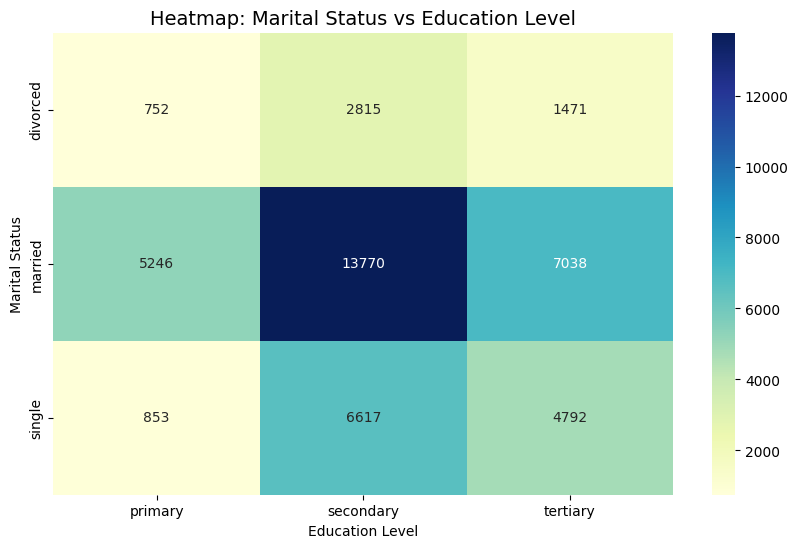

In [319]:
# Cross-tabulation for Age grouped by Marital Status and Education
cross_tab = pd.crosstab(
    bank_data_clean['marital'], bank_data_clean['education'])
print("Cross-tabulation of Marital Status and Education Level:")
print(cross_tab)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap: Marital Status vs Education Level", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Marital Status")
plt.show()

Occupation Value Counts Grouped by Outcome:
y    job          
no   blue-collar      9024
     management       8157
     technician       6757
     admin.           4540
     services         3785
     retired          1748
     self-employed    1392
     entrepreneur     1364
     housemaid        1131
     unemployed       1101
     student           669
yes  management       1301
     technician        840
     blue-collar       708
     admin.            631
     retired           516
     services          369
     student           269
     unemployed        202
     self-employed     187
     entrepreneur      123
     housemaid         109
Name: count, dtype: int64


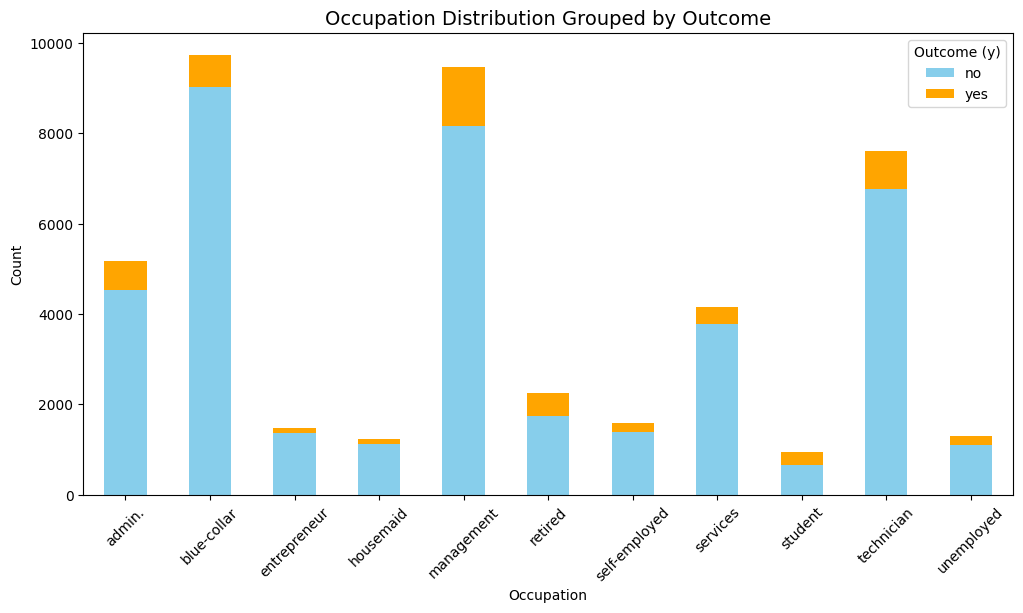

In [320]:
# Value counts grouped by 'y'
print("Occupation Value Counts Grouped by Outcome:")
print(bank_data_clean.groupby('y')['job'].value_counts())

# Stacked bar plot for Occupation by Outcome
occupation_counts = pd.crosstab(bank_data_clean['job'], bank_data_clean['y'])
occupation_counts.plot(kind='bar', stacked=True, figsize=(
    12, 6), color=['skyblue', 'orange'])
plt.title("Occupation Distribution Grouped by Outcome", fontsize=14)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.legend(title="Outcome (y)")
plt.xticks(rotation=45)
plt.show()

Marital Status Value Counts Grouped by Outcome:
y    marital 
no   married     24459
     single      10878
     divorced     4585
yes  married      2755
     single       1912
     divorced      622
Name: count, dtype: int64


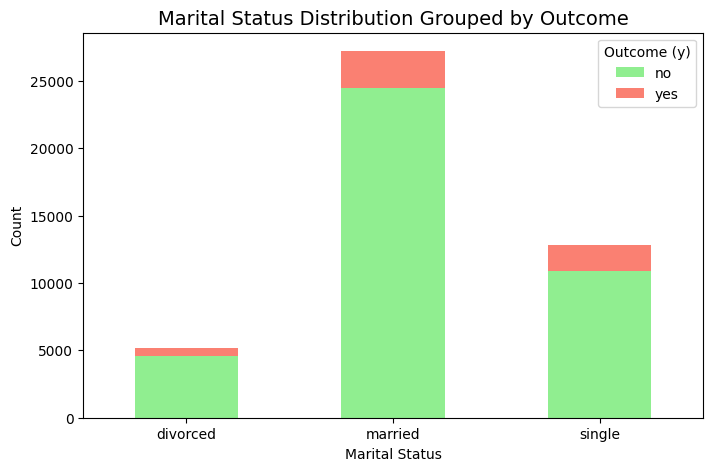

In [321]:
# Value counts grouped by 'y'
print("Marital Status Value Counts Grouped by Outcome:")
print(bank_data_clean.groupby('y')['marital'].value_counts())

# Stacked bar plot for Marital Status by Outcome
marital_counts = pd.crosstab(bank_data_clean['marital'], bank_data_clean['y'])
marital_counts.plot(kind='bar', stacked=True, figsize=(
    8, 5), color=['lightgreen', 'salmon'])
plt.title("Marital Status Distribution Grouped by Outcome", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Outcome (y)")
plt.xticks(rotation=0)
plt.show()

Education Level Value Counts Grouped by Outcome:
y    education
no   secondary    20752
     tertiary     11305
     primary       6260
yes  secondary     2450
     tertiary      1996
     primary        591
Name: count, dtype: int64


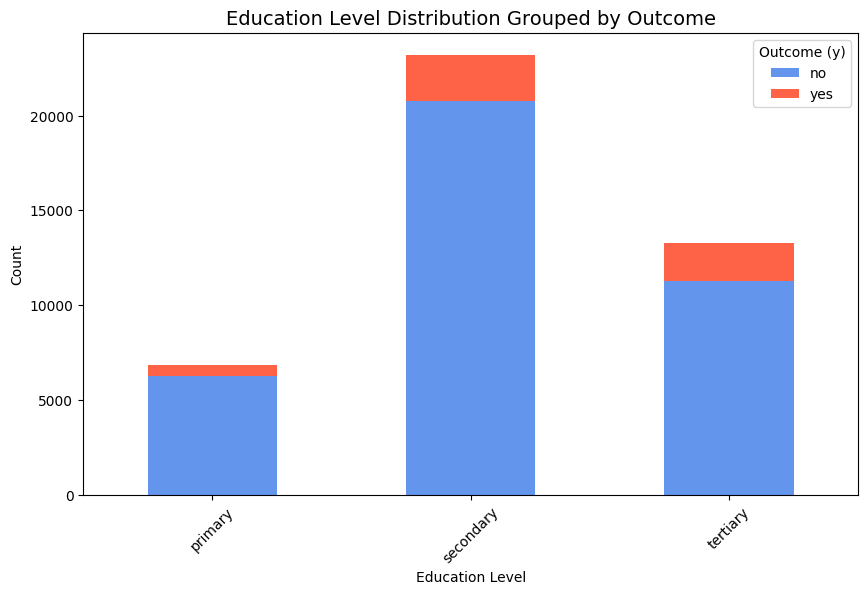

In [322]:
# Value counts grouped by 'y'
print("Education Level Value Counts Grouped by Outcome:")
print(bank_data_clean.groupby('y')['education'].value_counts())

# Stacked bar plot for Education Level by Outcome
education_counts = pd.crosstab(
    bank_data_clean['education'], bank_data_clean['y'])
education_counts.plot(kind='bar', stacked=True, figsize=(
    10, 6), color=['cornflowerblue', 'tomato'])
plt.title("Education Level Distribution Grouped by Outcome", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Outcome (y)")
plt.xticks(rotation=45)
plt.show()

Summary Statistics for Age Grouped by Outcome:
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/3680011732.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=bank_data_clean, palette='Set2')


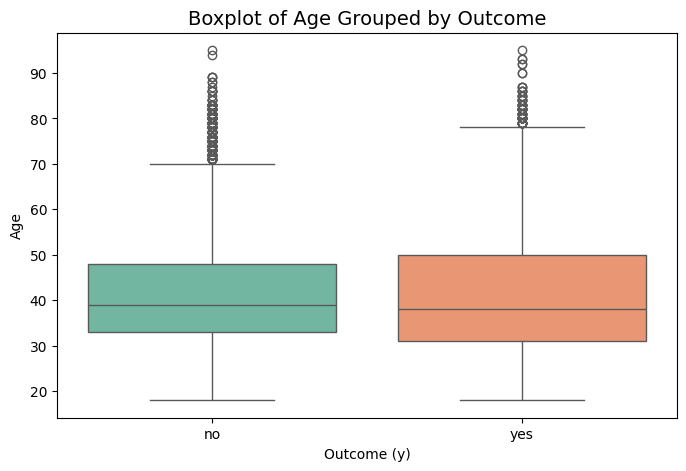

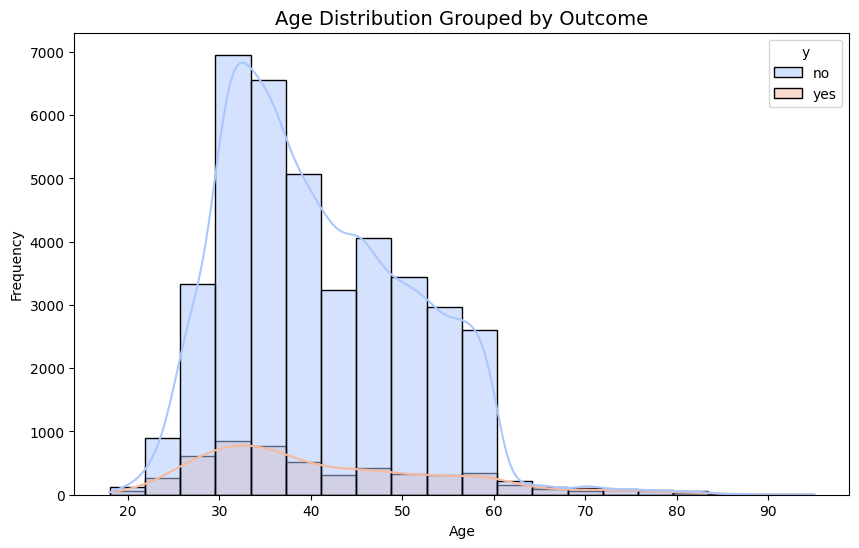

In [323]:
# Summary statistics for Age grouped by 'y'
print("Summary Statistics for Age Grouped by Outcome:")
print(bank_data_clean.groupby('y')['age'].describe())

# Boxplot for Age grouped by Outcome
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='age', data=bank_data_clean, palette='Set2')
plt.title("Boxplot of Age Grouped by Outcome", fontsize=14)
plt.xlabel("Outcome (y)")
plt.ylabel("Age")
plt.show()

# Histogram for Age grouped by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=bank_data_clean, x='age', hue='y',
             kde=True, bins=20, palette='coolwarm')
plt.title("Age Distribution Grouped by Outcome", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Education Level Value Counts Grouped by Outcome:
y    age
no   32     1864
     31     1790
     33     1762
     34     1732
     35     1685
            ... 
yes  87        3
     90        2
     92        2
     93        2
     95        1
Name: count, Length: 148, dtype: int64


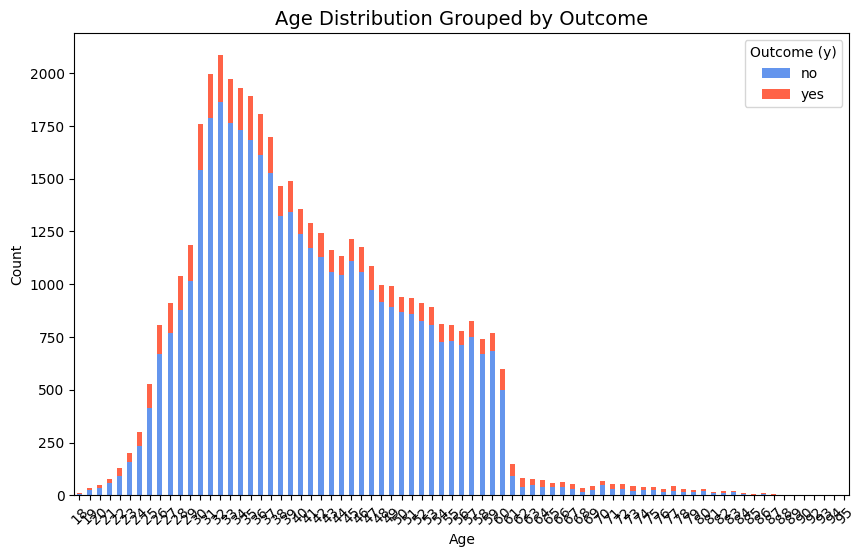

In [324]:
# Value counts grouped by 'y'
print("Education Level Value Counts Grouped by Outcome:")
print(bank_data_clean.groupby('y')['age'].value_counts())

# Stacked bar plot for Education Level by Outcome
education_counts = pd.crosstab(
    bank_data_clean['age'], bank_data_clean['y'])
education_counts.plot(kind='bar', stacked=True, figsize=(
    10, 6), color=['cornflowerblue', 'tomato'])
plt.title("Age Distribution Grouped by Outcome", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Outcome (y)")
plt.xticks(rotation=45)
plt.show()

Value Counts for Education Level Grouped by Outcome:
y    education
no   secondary    20752
     tertiary     11305
     primary       6260
yes  secondary     2450
     tertiary      1996
     primary        591
Name: count, dtype: int64


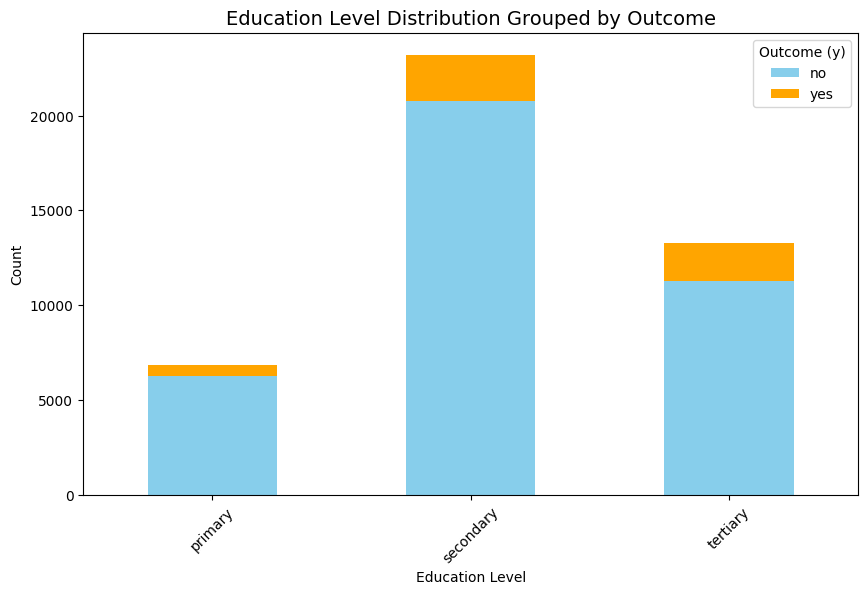

In [325]:
# Value counts of Education Level grouped by 'y'
print("Value Counts for Education Level Grouped by Outcome:")
print(bank_data_clean.groupby('y')['education'].value_counts())

# Stacked bar plot for Education Level grouped by Outcome
education_counts = pd.crosstab(
    bank_data_clean['education'], bank_data_clean['y'])
education_counts.plot(kind='bar', stacked=True, figsize=(
    10, 6), color=['skyblue', 'orange'])
plt.title("Education Level Distribution Grouped by Outcome", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Outcome (y)")
plt.xticks(rotation=45)
plt.show()

Cross-tabulation of Age Groups and Education Level Grouped by Outcome:
y                      no  yes
education age_group           
primary   <30         459   54
          30-40      1752  109
          40-50      2015  134
          50-60      1789  135
          60+         245  159
secondary <30        3516  604
          30-40      8485  806
          40-50      5238  478
          50-60      3285  384
          60+         228  178
tertiary  <30        1725  435
          30-40      5217  848
          40-50      2481  347
          50-60      1733  245
          60+         149  121


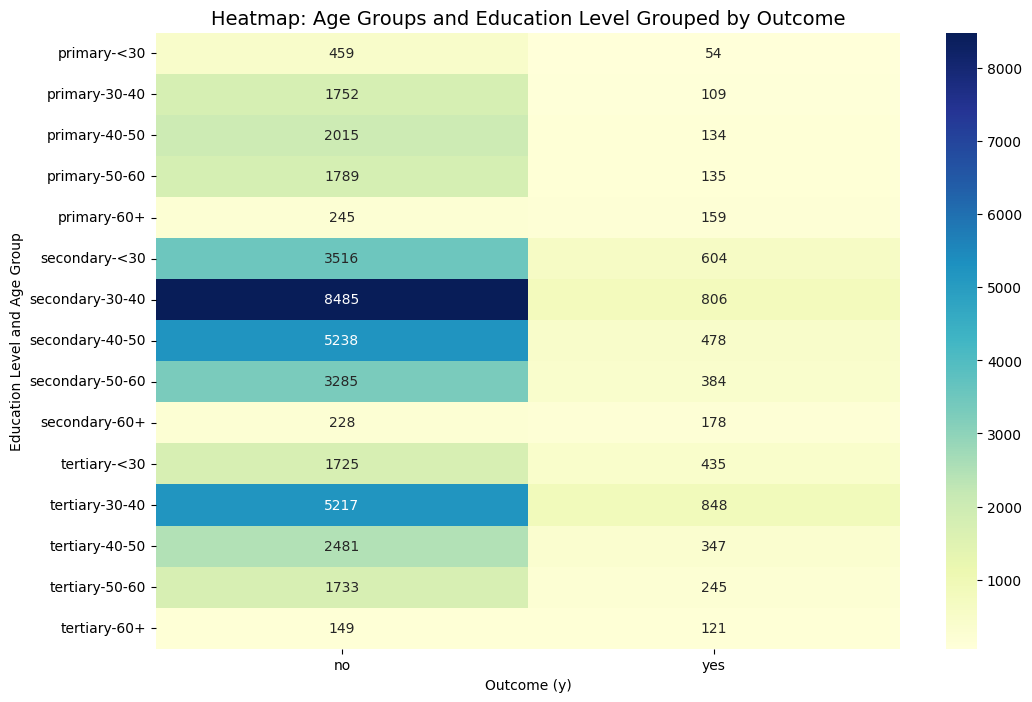

In [326]:
# Cross-tabulation of Education Level and Age grouped by Outcome
bank_data_clean['age_group'] = pd.cut(bank_data_clean['age'], bins=[
                                      0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
cross_tab = pd.crosstab([bank_data_clean['education'],
                        bank_data_clean['age_group']], bank_data_clean['y'])

print("Cross-tabulation of Age Groups and Education Level Grouped by Outcome:")
print(cross_tab)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Heatmap: Age Groups and Education Level Grouped by Outcome", fontsize=14)
plt.xlabel("Outcome (y)")
plt.ylabel("Education Level and Age Group")
plt.show()

In [ ]:
# Stratified sampling (30% of the data)
stratified_sample = bank_data_clean.groupby('y', group_keys=False).apply(
    lambda x: x.sample(frac=0.01, random_state=42))

# Verify the stratified sample distribution
print("Original Data Distribution:")
print(bank_data_clean['y'].value_counts(normalize=True))
print("\nStratified Sample Distribution:")
print(stratified_sample['y'].value_counts(normalize=True))

print("\nSize of the Original Sample:", bank_data_clean.shape)
# Check the size of the sample
print("\nSize of the Stratified Sample:", stratified_sample.shape)

Original Data Distribution:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Stratified Sample Distribution:
y
no     0.882808
yes    0.117192
Name: proportion, dtype: float64

Size of the Original Sample: (45211, 21)

Size of the Stratified Sample: (1809, 21)


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/328789428.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = bank_data_clean.groupby('y', group_keys=False).apply(



Descriptive Statistics for Age:
count    1809.000000
mean       40.739082
std        10.694543
min        20.000000
25%        32.000000
50%        39.000000
75%        48.000000
max        83.000000
Name: age, dtype: float64
Mean: 40.739082365948036
Median: 39.0
Mode: 32
Standard Deviation: 10.69454328224862


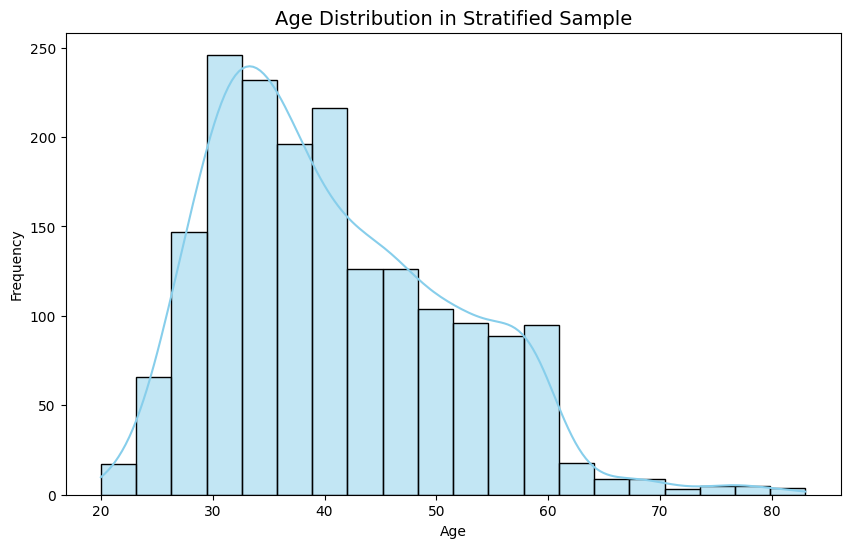

In [328]:
# Descriptive statistics for Age
print("\nDescriptive Statistics for Age:")
print(stratified_sample['age'].describe())

# Mean, median, mode, and standard deviation for Age
print("Mean:", stratified_sample['age'].mean())
print("Median:", stratified_sample['age'].median())
print("Mode:", stratified_sample['age'].mode()[0])
print("Standard Deviation:", stratified_sample['age'].std())

# Plot: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(stratified_sample['age'], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution in Stratified Sample", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/3871724434.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stratified_sample, y='job',



Occupation Value Counts:
job
blue-collar      395
management       350
technician       311
admin.           207
services         172
retired           94
unemployed        74
housemaid         57
self-employed     57
entrepreneur      56
student           28
Name: count, dtype: int64


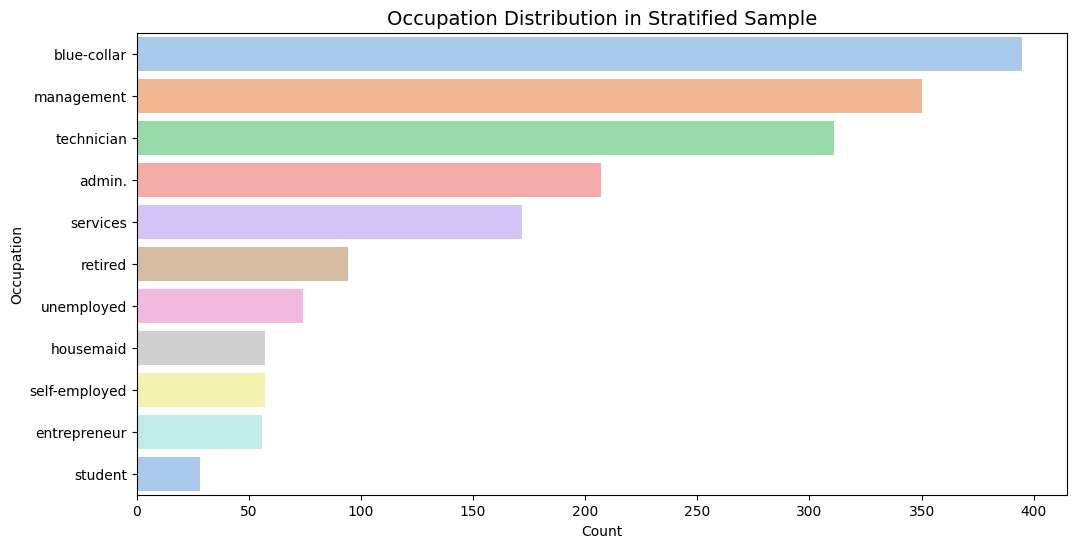

In [329]:
# Descriptive statistics for Occupation
print("\nOccupation Value Counts:")
print(stratified_sample['job'].value_counts())

# Plot: Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=stratified_sample, y='job',
              order=stratified_sample['job'].value_counts().index, palette="pastel")
plt.title("Occupation Distribution in Stratified Sample", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()


Marital Status Value Counts:
marital
married     1087
single       505
divorced     217
Name: count, dtype: int64


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/2498307053.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stratified_sample, x='marital',


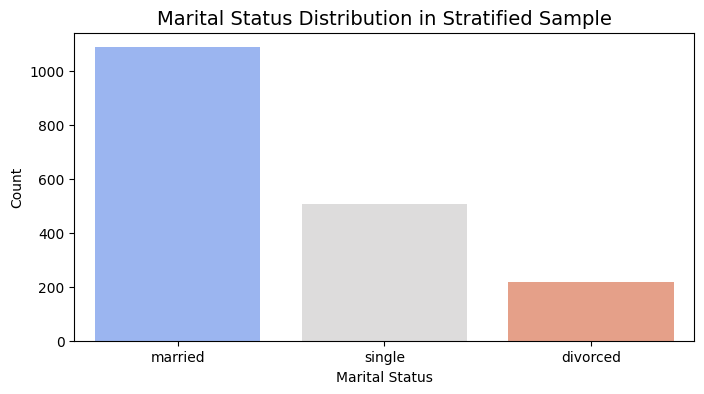

In [330]:
# Descriptive statistics for Marital Status
print("\nMarital Status Value Counts:")
print(stratified_sample['marital'].value_counts())

# Plot: Marital Status Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=stratified_sample, x='marital',
              order=stratified_sample['marital'].value_counts().index, palette="coolwarm")
plt.title("Marital Status Distribution in Stratified Sample", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


Education Level Value Counts:
education
secondary    950
tertiary     503
primary      285
Name: count, dtype: int64


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_61696/3924741128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stratified_sample, x='education',


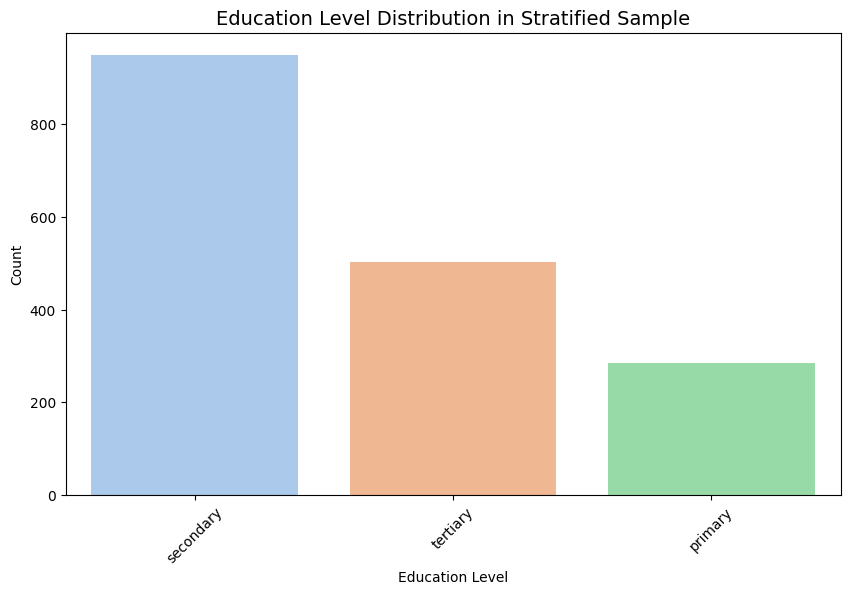

In [331]:
# Descriptive statistics for Education Level
print("\nEducation Level Value Counts:")
print(stratified_sample['education'].value_counts())

# Plot: Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=stratified_sample, x='education',
              order=stratified_sample['education'].value_counts().index, palette="pastel")
plt.title("Education Level Distribution in Stratified Sample", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [332]:
# Full dataset statistics
full_stats = bank_data_clean[['age']].agg(
    ['mean', 'median', lambda x: x.mode()[0], 'std']).T.rename(columns={0: 'Mode'})
full_stats.columns = ['Full_Mean', 'Full_Median', 'Full_Mode', 'Full_Std']

# Stratified sample statistics
sample_stats = stratified_sample[['age']].agg(
    ['mean', 'median', lambda x: x.mode()[0], 'std']).T.rename(columns={0: 'Mode'})
sample_stats.columns = ['Sample_Mean',
                        'Sample_Median', 'Sample_Mode', 'Sample_Std']

# Combine results
comparison = pd.concat([full_stats, sample_stats], axis=1)
print("Comparison of Metrics (Full Dataset vs Stratified Sample):")
comparison

Comparison of Metrics (Full Dataset vs Stratified Sample):


,Full_Mean,Full_Median,Full_Mode,Full_Std,Sample_Mean,Sample_Median,Sample_Mode,Sample_Std
age,40.93621,39.0,32.0,10.618762,40.739082,39.0,32.0,10.694543
